In [21]:
import numpy as np
import pandas as pd
import re as re
import seaborn as sns
from matplotlib import pyplot as plt

In [22]:
train = pd.read_csv('train.csv', header = 0, dtype = {'Age': np.float64})
test = pd.read_csv('test.csv', header = 0, dtype = {'Age': np.float64})
#cópia do arquivo de test - não vai ser manipulado
submission = pd.read_csv('test.csv', header = 0, dtype = {'Age': np.float64})

#dtype como float pq as crianças eles colocaram como decimal quando tinha menos de 1 ano

#algoritmo supervisionado - tem os dados para treinar (70%train 30%test - divisão usual)
#os dados de train e test nõ podem ser os mesmos

In [23]:
#laço - loop com a função 'for' - para repetir ações sobre variáveis, automatizada
full_data = [train, test]

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
test.head()
# não tem a coluna de sobrevivência - vai comparar com os valores do train para saber se a proporção está parecida
# quando tem 100% de acerto é um problema tb, pois está muito certo apenas para um certo grupo de dados

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
train.info()
#"Age" "714 non-null" "float64" - dtype como float pq as crianças eles colocaram como decimal quando tinha menos de 1 ano

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
# média dos sobreviventes por classe - quanto maior a classe aior a taxa de sobrevivência
# tem MUITA influênciapara esse problema
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


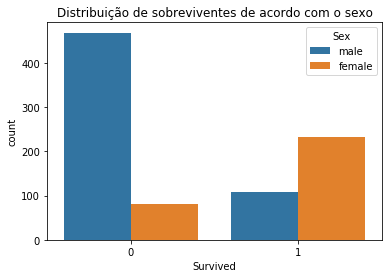

Total de sobreviventes: 342
      Sex  Survived
0  female  0.742038
1    male  0.188908


In [29]:
# utilizando o conjunto de Treinamento vamos observar os dados
# Observando os dados em relação de sobreviventes ao sexo da pessoa
p = sns.countplot(data=train, x = 'Survived', hue = 'Sex')
plt.title("Distribuição de sobreviventes de acordo com o sexo")
plt.show()

# variáveis para exibir
total_survived_females = train[train.Sex == "female"]["Survived"].sum()
total_survived_males = train[train.Sex == "male"]["Survived"].sum()

print("Total de sobreviventes: " + str((total_survived_females + total_survived_males)))
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())
# Pelo resultado o sexo é um fator determinante para a sobrevivência dos passageiros

In [30]:
# vai juntar todas as pessoas que estavam juntos daquele passageiro (+1 para contar a própria pessoa)
# faz com os 2 dataset pq eles precisam ter as mesmas colunas - variáveis

for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [31]:
# a maior taxa de sobrevivência é de pessoas entre 1 e 3 pessoas viajando junto
# depois que passa desse valor a taxa de sobrevivência diminui muito
# pessoas viajando sozinho tem uma taxa mais baixa, provavelmente essas pessoas devem ser homens

print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())


   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [32]:
# full_data[0] ou [1] significa o 1o item da lista (train)
full_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [33]:
train['Embarked'].value_counts()
# o embarque na porta S é o mais frequente

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
# valores nulos a porta de emarque - substituir pelo valor mais frequente

for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [35]:
print(train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [36]:
# 'Age' tem muitos valores nulos - média e desvio padrão - sortear valores nessa faixa para substituir nos nulos
# como é aleatório não muda a proporção geral das idades dos participantes

media = train['Age'].mean()
desvio = train['Age'].std()
print('Média: ', media)
print('Desvio: ', desvio)

Média:  29.69911764705882
Desvio:  14.526497332334044


In [37]:
#categorizar as idades
#dentro de cada dataset (train e test) corrigimos o campo Age

for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)
print(train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())
    
    
    

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.534483
1   (16.0, 32.0]  0.353741
2   (32.0, 48.0]  0.366142
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


C:\Users\Ana Oliveira\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [38]:
full_data[0].info()
# todos os dados estão preenchidos, menos a cabine, mas essa variável não vai ser usada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Age               891 non-null int32
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             204 non-null object
Embarked          891 non-null object
FamilySize        891 non-null int64
CategoricalAge    891 non-null category
dtypes: category(1), float64(1), int32(1), int64(6), object(5)
memory usage: 88.0+ KB


In [39]:
# transformar categorias em números ex:Sexo, Porta de Embarque, Idade

# dentro de cada dataset (train e teste) transformamos nossas variáveis em valores numéricos
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int) 
    
    # criou um código para cada faixa etária - que foi definido em 'CategoricalAge'     
    # Mapping Age
    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

In [40]:
# Seleção de variáveis que não iremos utilizar
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Parch','Fare']

train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))

# valores das colunas dos dois dataset precisam ser iguais
# no dataset test vai ser anexada a coluna 'Survived'
train = train.values
test  = test.values

   Survived  Pclass  Sex  Age  Embarked  FamilySize
0         0       3    1    1         0           2
1         1       1    0    2         1           2
2         1       3    0    1         0           1
3         1       1    0    2         0           2
4         0       3    1    2         0           1
5         0       3    1    1         2           1
6         0       1    1    3         0           1
7         0       3    1    0         0           5
8         1       3    0    1         0           3
9         1       2    0    0         1           2


In [41]:
# validação cruzada - terina e valida todos os trechos do dataset train
# SVC
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [42]:
classifiers = [SVC(probability=True)]
candidate_classifier = SVC()

In [43]:
# treinar
candidate_classifier.fit(train[0::, 1::], train[0::,0])

C:\Users\Ana Oliveira\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
# testar

In [45]:
result = candidate_classifier.predict(test)
print(result)
# essa é a coluna "Survived" do arquiv de test - precisa passar ela para o dataset original 'submission'

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [46]:

final = pd.DataFrame({
        # dados armazenados em submission
        "PassengerId": submission["PassengerId"],
        "Pclass": submission["Pclass"],
        "Pclass": submission["Name"],
        "Sex": submission["Sex"],
        "Age": submission["Age"],
        "FamilySize": submission['SibSp'] + submission['Parch'] + 1,
        # dados armazenados em result
        "Survived": result
    })

In [47]:
final.head()

,PassengerId,Pclass,Sex,Age,FamilySize,Survived
0,892,"Kelly, Mr. James",male,34.5,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,2,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,1,0
3,895,"Wirz, Mr. Albert",male,27.0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3,1


In [48]:
final.to_csv("titanic.csv", index=False)
print(final.shape)

(418, 6)


In [49]:
print (final[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.268775
1           2  0.486486
2           3  0.684211
3           4  0.642857
4           5  0.285714
5           6  0.666667
6           7  0.000000
7           8  0.000000
8          11  0.000000
